In [5]:
"""
METHOD

1) Train a model fully with the leNet5 net and the mnist dataset
2) Retrive it's weights (for each parameters and compute it's loss function)

"""
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np

# Define the LeNet5 model
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16*4*4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 16*4*4)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)


In [2]:
# Training of the model

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Initialize a list to store the loss values
loss_values = []

# Train the model and store the loss values
model = LeNet5()
# parameters 
num_epochs = 5

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
for epoch in range(num_epochs):
    total_loss = 0
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loss_values.append(loss.item())
        
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    accuracy = correct / total * 100
    avg_loss = total_loss / (i + 1)
    print(f'Epoch: {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')  

# Save the trained model weights
model_weights_path = 'models_weights/lenet5_mnist_weights.pth'
torch.save(model.state_dict(), model_weights_path)

Epoch: 1/5, Loss: 0.1958, Accuracy: 93.77%
Epoch: 2/5, Loss: 0.0628, Accuracy: 98.08%
Epoch: 3/5, Loss: 0.0471, Accuracy: 98.61%
Epoch: 4/5, Loss: 0.0371, Accuracy: 98.82%
Epoch: 5/5, Loss: 0.0301, Accuracy: 99.07%


In [6]:
# IF THE MODEL IS ALREADY TRAINED
# Load the saved model
model_weights_path = 'models_weights/lenet5_mnist_weights.pth'
saved_weights = torch.load(model_weights_path)
# Create a new model and load the saved weights
learnt_net = LeNet5()
learnt_net.load_state_dict(saved_weights)

<All keys matched successfully>

# Ways of plotting th loss function 
Neural networks are trained on a corpus of feature vectors (e.g., images) {xi} and accompanying
labels {yi} by minimizing a loss of the form L(θ) = sum (for i in dataset) Loss (xi, yi; θ), where θ denotes the
parameters (weights) of the neural network, the function `(xi, yi; θ) measures how well the neural
network with parameters θ predicts the label of a data sample, and m is the number of data samples.
Neural nets contain many parameters, and so their loss functions live in a very high-dimensional
space. Unfortunately, visualizations are only possible using low-dimensional 1D (line) or 2D (surface)
plots. Several methods exist for closing this dimensionality gap.
1-Dimensional Linear Interpolation One simple and lightweight way to plot loss functions is
to choose two sets of parameters θ and θ
0
, and plot the values of the loss function along the line
connecting these two points. We can parameterize this line by choosing a scalar parameter α, and
defining the weighted average θ(α) = (1−α)θ+αθ0
. Finally, we plot the function f(α) = L(θ(α)).
This strategy was taken by Goodfellow et al. [13], who studied the loss surface along the line between
a random initial guess, and a nearby minimizer obtained by stochastic gradient descent. This method
has been widely used to study the “sharpness” and “flatness” of different minima, and the dependence. However there is some limitation in the plotting of such a 1D loss landscape.

For 2D visulization : 
Contour Plots & Random Directions To use this approach, one chooses a center point θ in the graph, and chooses two direction vectors, δ and η. One then plots a function of the form
f(α) = L(θ + αδ) in the 1D (line) case, or f(α, β) = L(θ∗ + αδ + βη)

# Interesting approch : Filter-Wise Normalization




In [7]:
from torch.nn.utils import (
  parameters_to_vector as Params2Vec,
  vector_to_parameters as Vec2Params
)

theta_ast = Params2Vec(learnt_net.parameters())

infer_net = LeNet5()
theta = Params2Vec(infer_net.parameters())

loss_fn = torch.nn.NLLLoss()


In [16]:
theta_ast.type()

'torch.FloatTensor'

In [ ]:
# Method to plot the loss fucntion from internet

"""
x = torch.linspace(-20, 20, 20)
y = torch.linspace(-20, 20, 20)
alpha, beta = torch.meshgrid(x, y)
space = tau_2d(alpha, beta, theta_ast)

losses = torch.empty_like(space[0, :, :])

for a, _ in enumerate(x):
  print(f'a = {a}')
  for b, _ in enumerate(y):
    Vec2Params(space[:, a, b], infer_net.parameters())
    for _, (data, label) in enumerate(train_loader):
      with torch.no_grad():
        infer_net.eval()
        losses[a][b] = loss_fn(infer_net(data), label).item()
        

"""

In [8]:
def tau_2d(alpha, beta, theta_ast):
  a = alpha * theta_ast[:,None,None]
  b = beta * alpha * theta_ast[:,None,None]
  return a + b

# Define the range and step size
x = torch.linspace(-100, 100, 10)
y = torch.linspace(-100, 100, 10) 

alpha, beta = torch.meshgrid(x, y)
space = tau_2d(alpha, beta, theta_ast)

losses = torch.empty_like(space[0, :, :])

# Set batch size and create data loader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Making the loss landscape on only one batch

data, label = next(iter(train_loader))

# Maybe try to see it on one batch only
for a, _ in enumerate(x):
    #print(f'a = {a}')
    for b, _ in enumerate(y):
        Vec2Params(space[:, a, b], infer_net.parameters())
        total_loss = 0
        total_samples = 0
        
        with torch.no_grad():
            infer_net.eval()
            batch_size = data.size(0)
            total_samples += batch_size
            loss = loss_fn(infer_net(data), label)
            total_loss += loss.item() * batch_size

        losses[a][b] = total_loss / total_samples

c:\Users\Robin\anaconda3\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [9]:
# Save the table to a file
np.savetxt('loss_landscape.txt', losses)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
# Load the table from the file
loadedTable = np.loadtxt('loss_landscape.txt')

In [11]:
loadedTable

array([[-9.95615836e+20, -2.79314533e+20, -5.05953646e+19,
        -3.69971507e+18, -1.10639614e+16, -6.70278910e+16,
        -1.22719659e+19, -1.48836843e+20, -7.80463471e+20,
        -2.70358995e+21],
       [-2.83380158e+20, -7.95007336e+19, -1.44008601e+19,
        -1.05304256e+18, -3.14911324e+15, -1.90780300e+16,
        -3.49294668e+18, -4.23631451e+19, -2.22141811e+20,
        -7.69517402e+20],
       [-5.26901321e+19, -1.47819256e+19, -2.67761565e+18,
        -1.95796890e+17, -5.85528462e+14, -3.54726852e+15,
        -6.49459391e+17, -7.87676991e+18, -4.13038272e+19,
        -1.43079835e+20],
       [-4.09718495e+18, -1.14944265e+18, -2.08211407e+17,
        -1.52251662e+16, -4.55306505e+13, -2.75836456e+14,
        -5.05020422e+16, -6.12498277e+17, -3.21178726e+18,
        -1.11258955e+19],
       [-1.68608551e+16, -4.73021928e+15, -8.56837520e+14,
        -6.26549745e+13, -1.87368260e+11, -1.13514853e+12,
        -2.07828720e+14, -2.52058048e+15, -1.32172830e+16,
        -4.

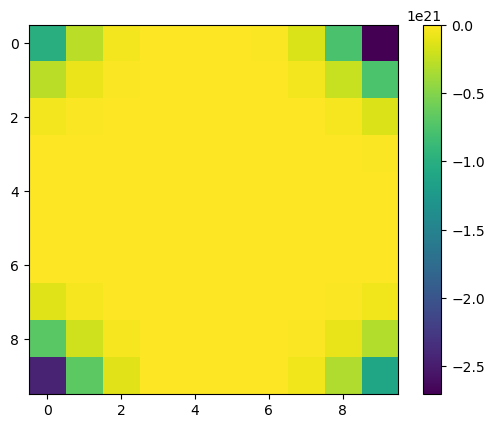

In [12]:
# without normalization
type(loadedTable)
def plot_2d_array(array):
    plt.imshow(array, cmap='viridis')
    plt.colorbar()
    plt.show()
    
plot_2d_array(loadedTable)

In [ ]:
# with normalization


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import copy

def filterwise_normalize(direction, model):
    norm_direction = []
    idx = 0
    for param in model.parameters():
        param_size = param.size()
        param_direction = direction[idx: idx + param.numel()].view(param_size)
        norm_param_direction = param_direction * (param.norm() / param_direction.norm())
        norm_direction.append(norm_param_direction)
        idx += param.numel()
    return norm_direction

def loss_landscape(model, criterion, data, labels, center, alpha_range, beta_range, num_steps):
    model.eval()
    grid_loss = np.zeros((num_steps, num_steps))
    random_direction1 = torch.normal(mean=0, std=1, size=(sum(p.numel() for p in model.parameters()),))
    random_direction2 = torch.normal(mean=0, std=1, size=(sum(p.numel() for p in model.parameters()),))
    
    direction1 = filterwise_normalize(random_direction1, model)
    direction2 = filterwise_normalize(random_direction2, model)
    
    original_params = [param.clone() for param in model.parameters()]
    
    with torch.no_grad():
        for i, alpha in enumerate(alpha_range):
            for j, beta in enumerate(beta_range):
                for original_param, param, d1, d2 in zip(original_params, model.parameters(), direction1, direction2):
                    param_size = param.size()
                    update = (alpha * d1.view(-1) + beta * d2.view(-1)).view(param_size)
                    param.data.copy_(original_param + update)
                
                temp_output = model(data)
                grid_loss[j, i] = criterion(temp_output, labels).item()
    
    # Restore the original parameters
    for original_param, param in zip(original_params, model.parameters()):
        param.data.copy_(original_param)
    
    return grid_loss

# Generate a random mini-batch from the train_loader
data, labels = next(iter(train_loader))

# Generate the alpha and beta range for the plot
num_steps = 10
alpha_range = np.linspace(-1, 1, num_steps)
beta_range = np.linspace(-1, 1, num_steps)

# Compute the loss landscape
grid_loss = loss_landscape(model, criterion, data, labels, model.state_dict(), alpha_range, beta_range, num_steps)

# Plot the loss landscape
plt.contourf(alpha_range, beta_range, grid_loss, levels=100, cmap="viridis")
plt.xlabel("Alpha")
plt.ylabel("Beta")
plt.title("Loss Landscape with Filter-wise Normalization")
plt.colorbar()
plt.show()


: 

: 